{'Vinnie': {'AMETHYSTS': 9366.0, 'STARFRUIT': -7105.0}, 'Remy': {'AMETHYSTS': -13626.0, 'STARFRUIT': -31033.0}, 'Ruby': {'AMETHYSTS': -12052.0, 'STARFRUIT': -19537.0}, 'Rhianna': {'AMETHYSTS': -6930.0, 'STARFRUIT': -8607.0}, 'Valentina': {'AMETHYSTS': 30418.0, 'STARFRUIT': 84544.0}, 'Vladimir': {'AMETHYSTS': 6348.0, 'STARFRUIT': 4380.0}, 'Adam': {'AMETHYSTS': -1968.0, 'STARFRUIT': -7689.0}, 'Amelia': {'AMETHYSTS': -11556.0, 'STARFRUIT': -14953.0}}
{'Remy': {'CHOCOLATE': 76161.0, 'STRAWBERRIES': -12664.0, 'ROSES': -23507.0, 'GIFT_BASKET': 0.0}, 'Vinnie': {'CHOCOLATE': -737346.0, 'STRAWBERRIES': -351684.5, 'ROSES': -173968.0, 'GIFT_BASKET': -109784.0}, 'Ruby': {'CHOCOLATE': 0.0, 'STRAWBERRIES': 0.0, 'ROSES': 0.0, 'GIFT_BASKET': 60453.0}, 'Rhianna': {'CHOCOLATE': 0.0, 'STRAWBERRIES': 0.0, 'ROSES': 3384.0, 'GIFT_BASKET': 889528.0}, 'Vladimir': {'CHOCOLATE': 661185.0, 'STRAWBERRIES': 364348.5, 'ROSES': 194091.0, 'GIFT_BASKET': -840197.0}}
{'Valentina': {'COCONUT': 0.0, 'COCONUT_COUPON': -15

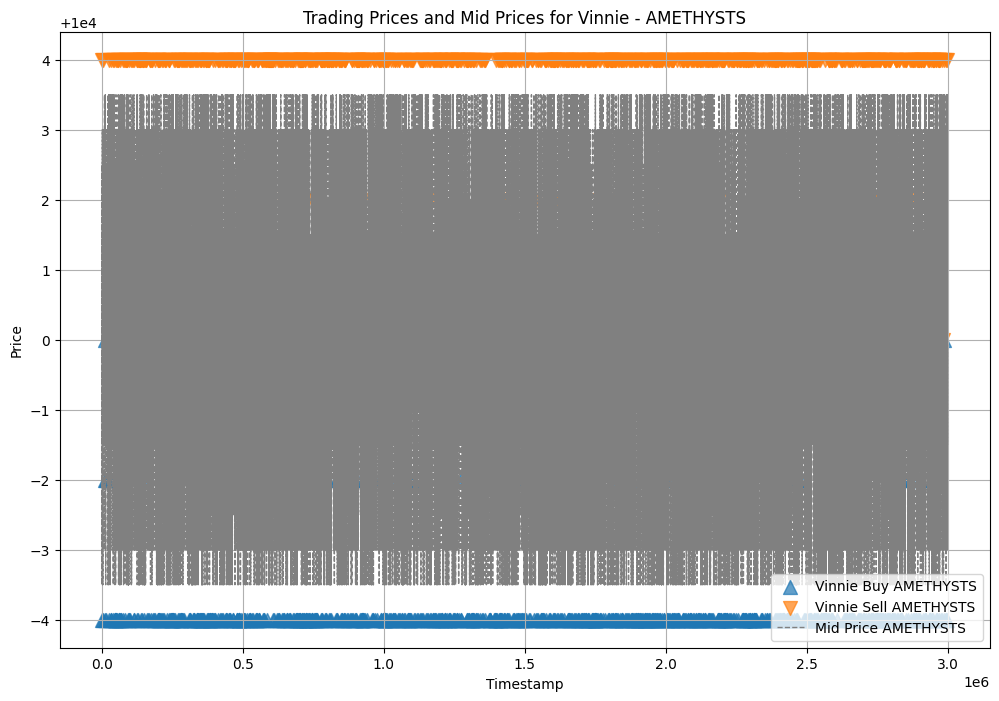

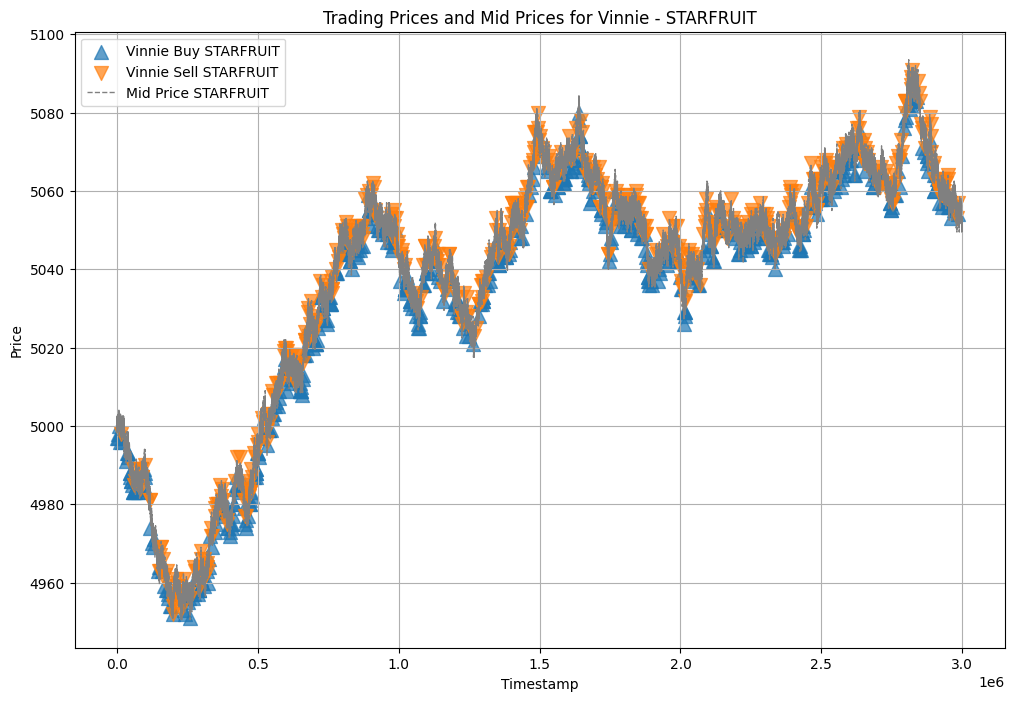

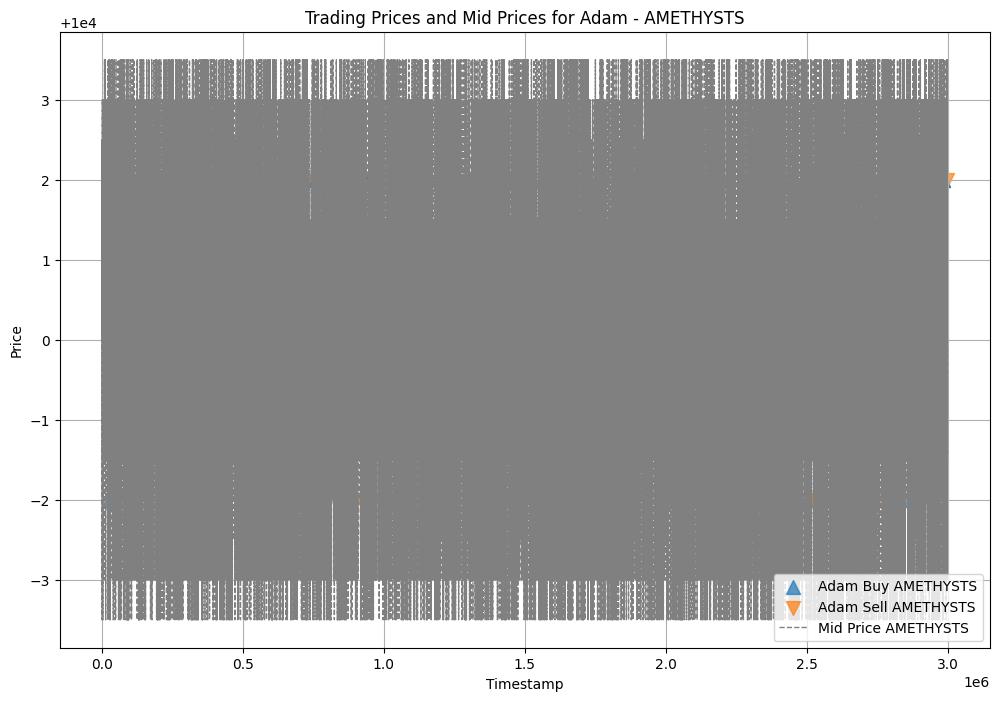

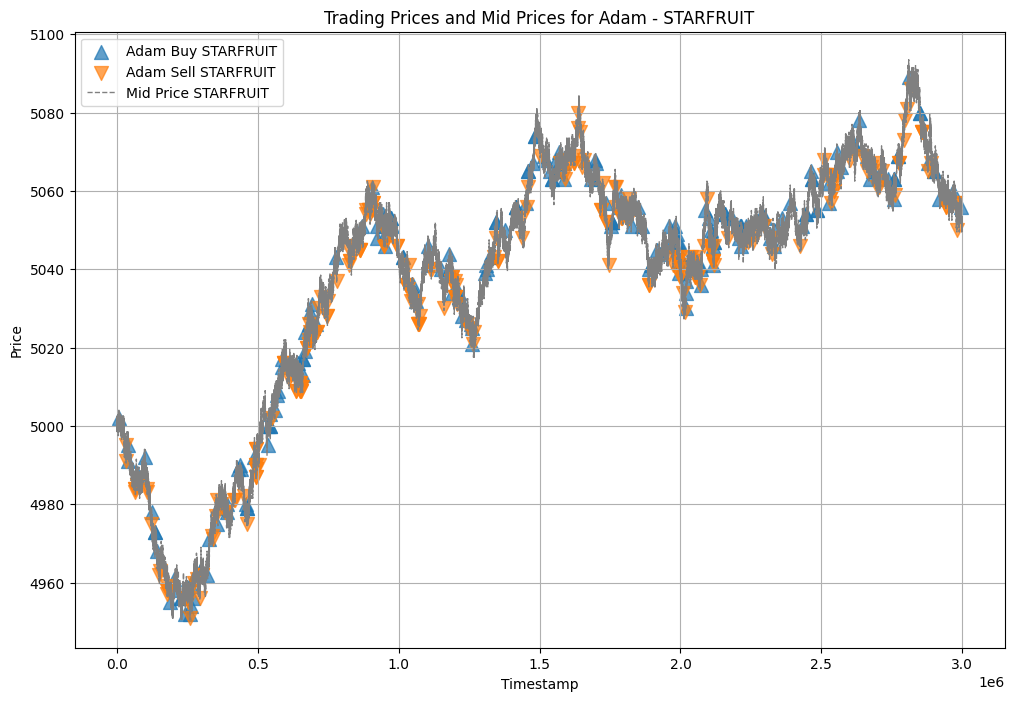

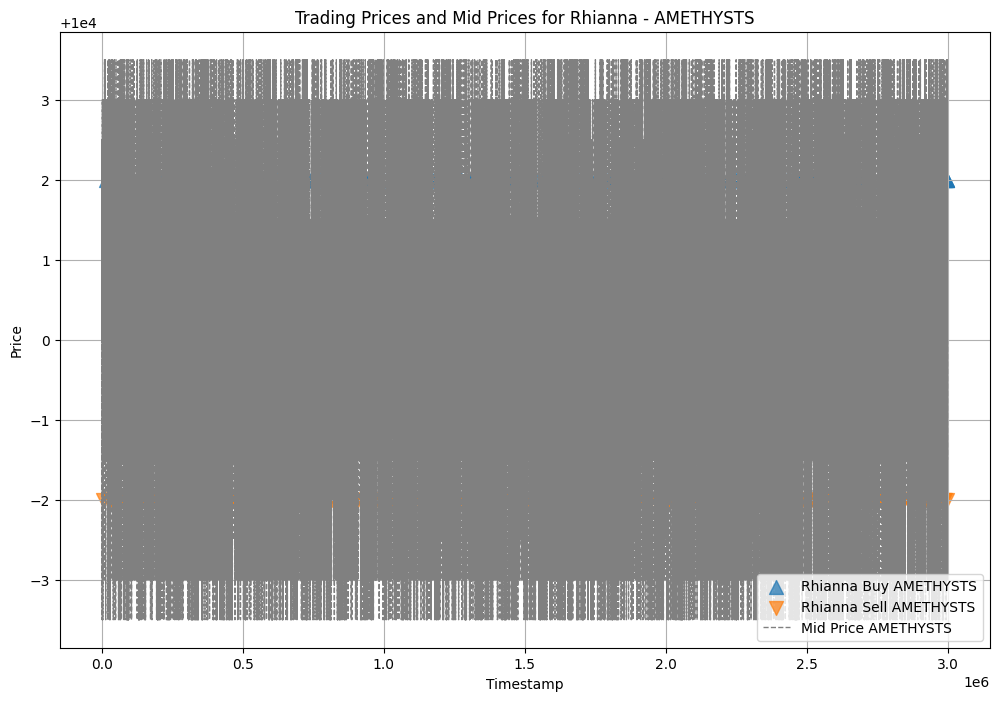

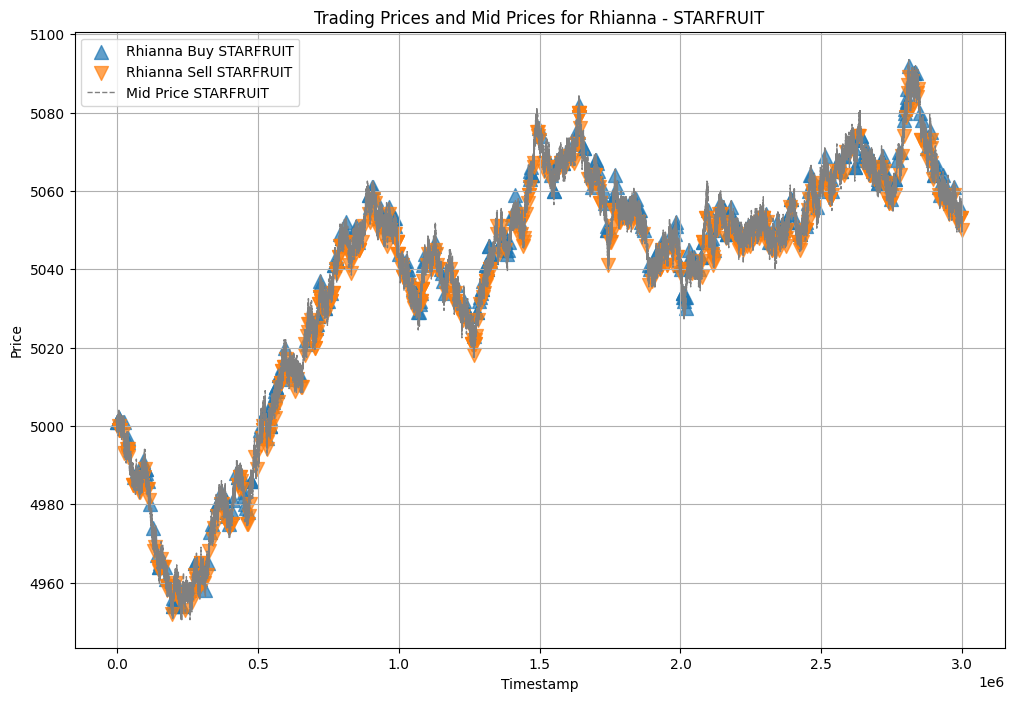

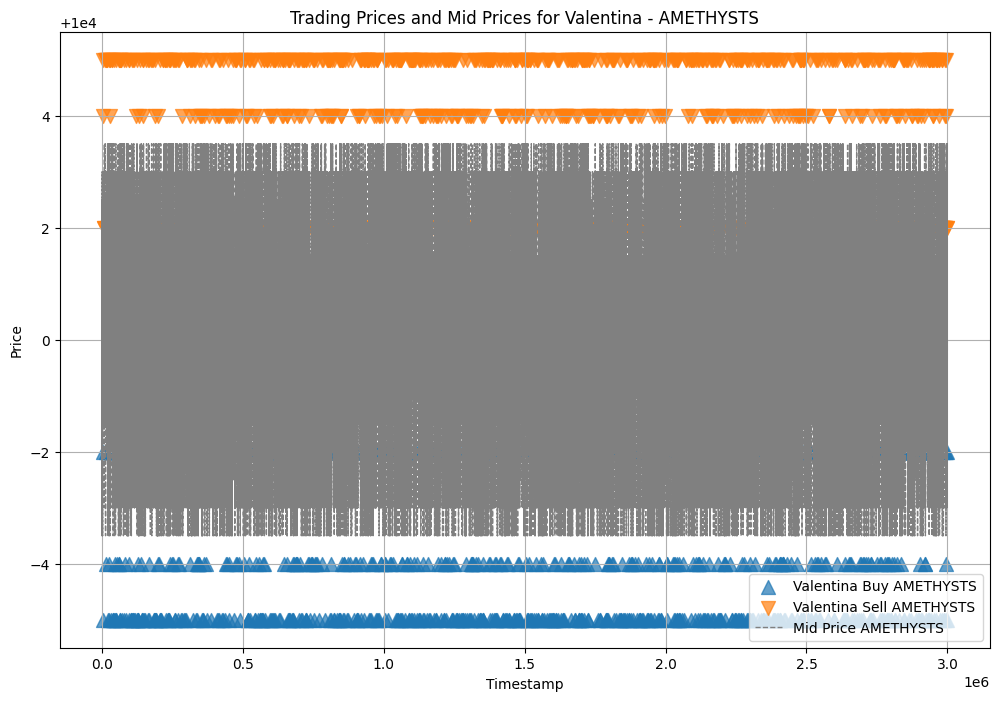

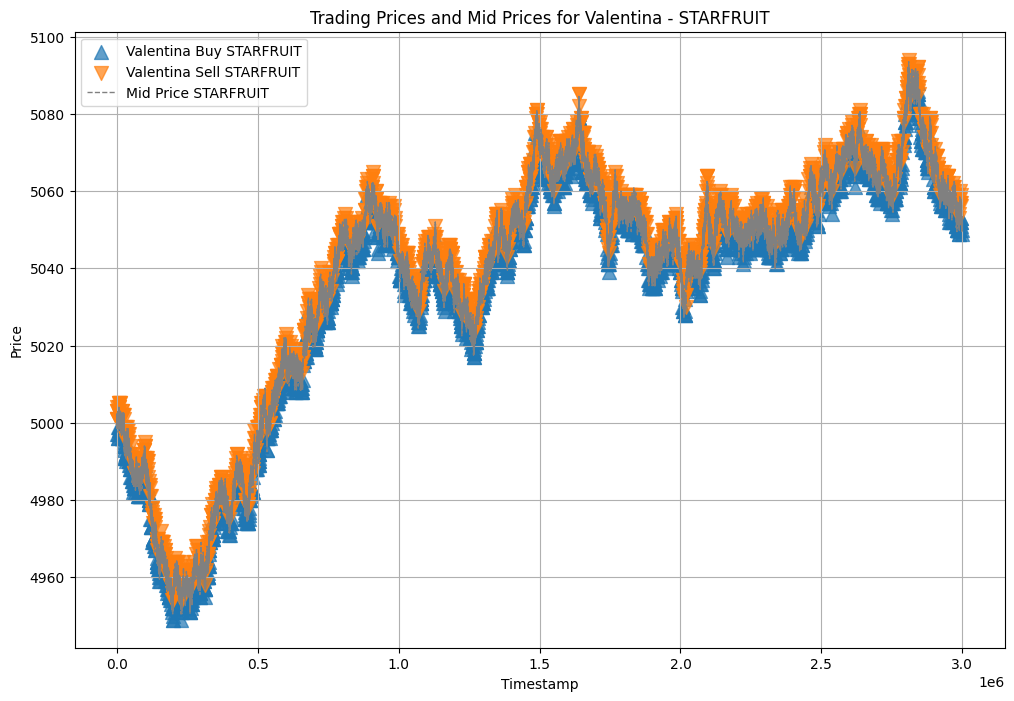

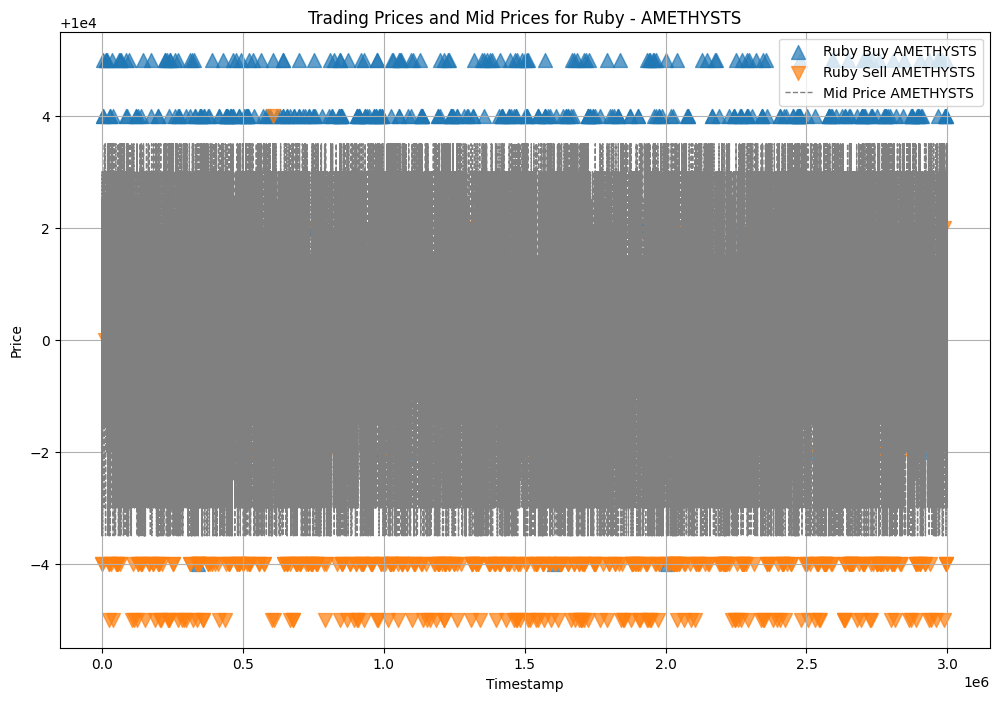

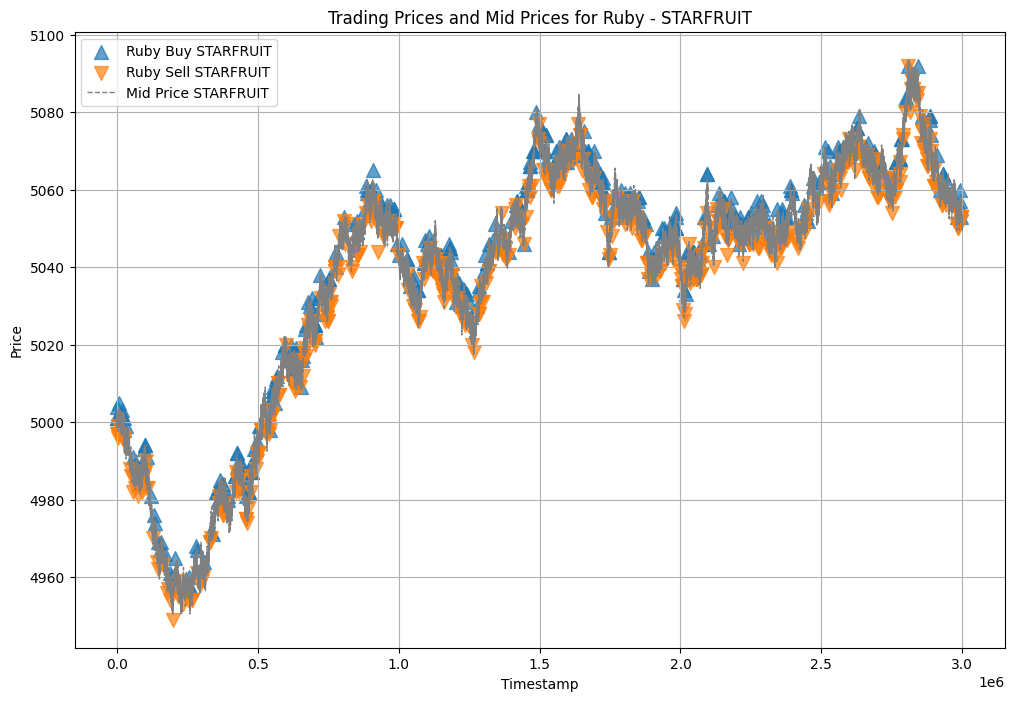

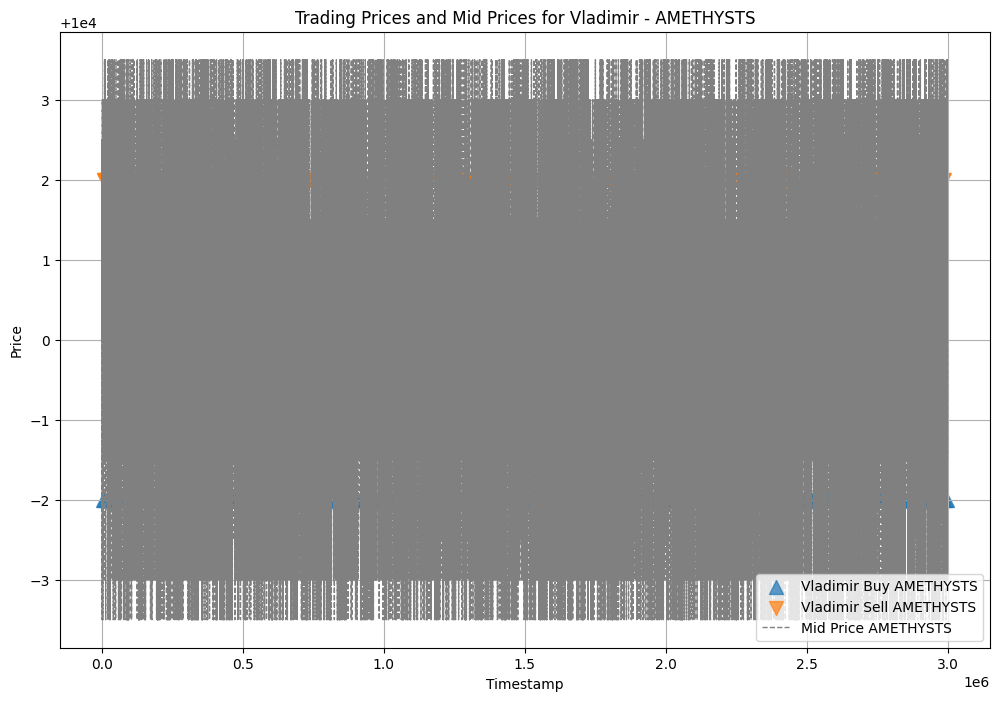

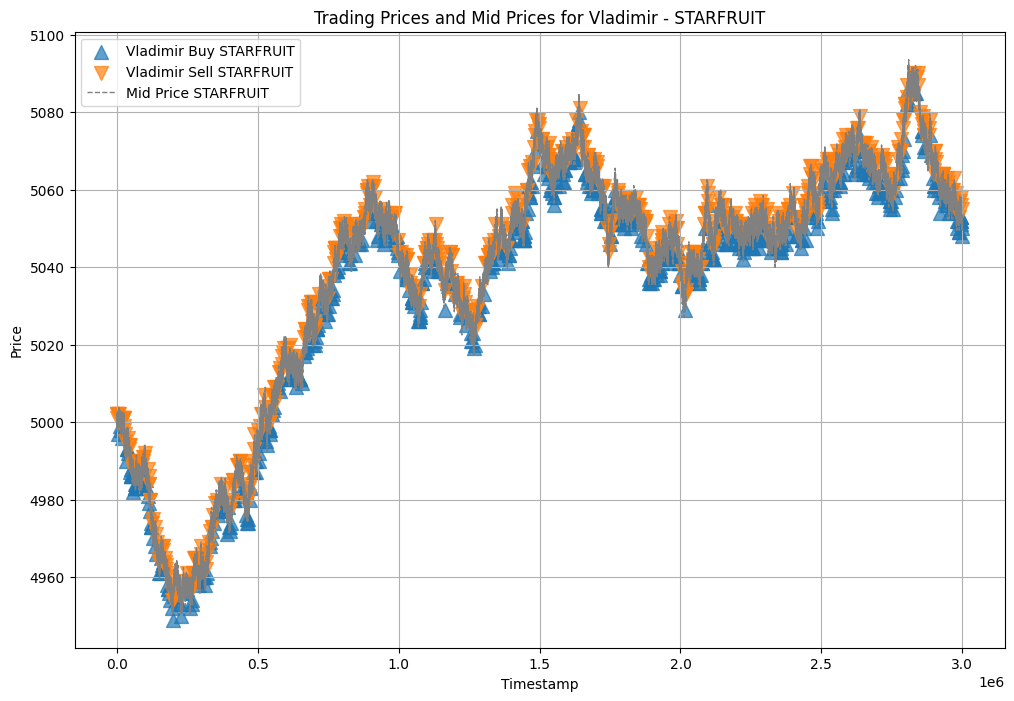

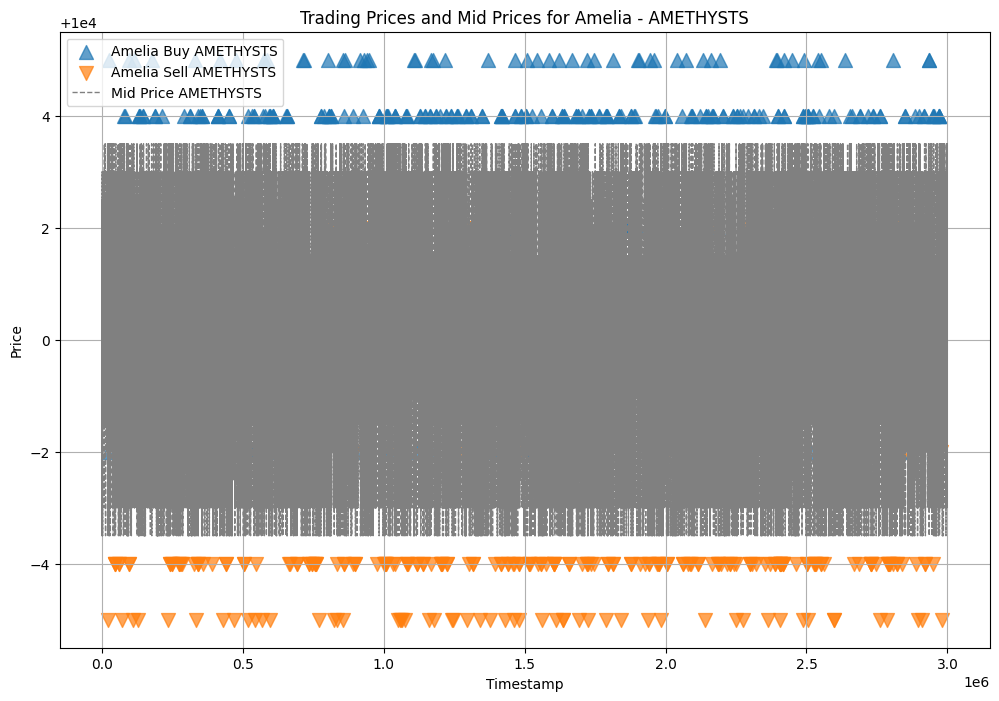

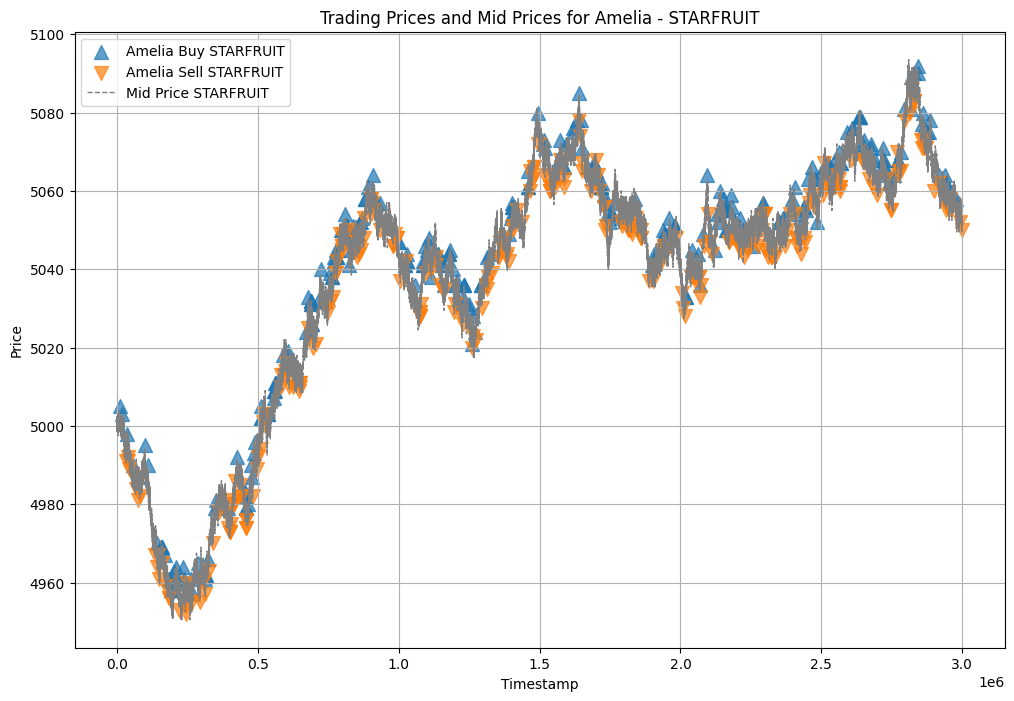

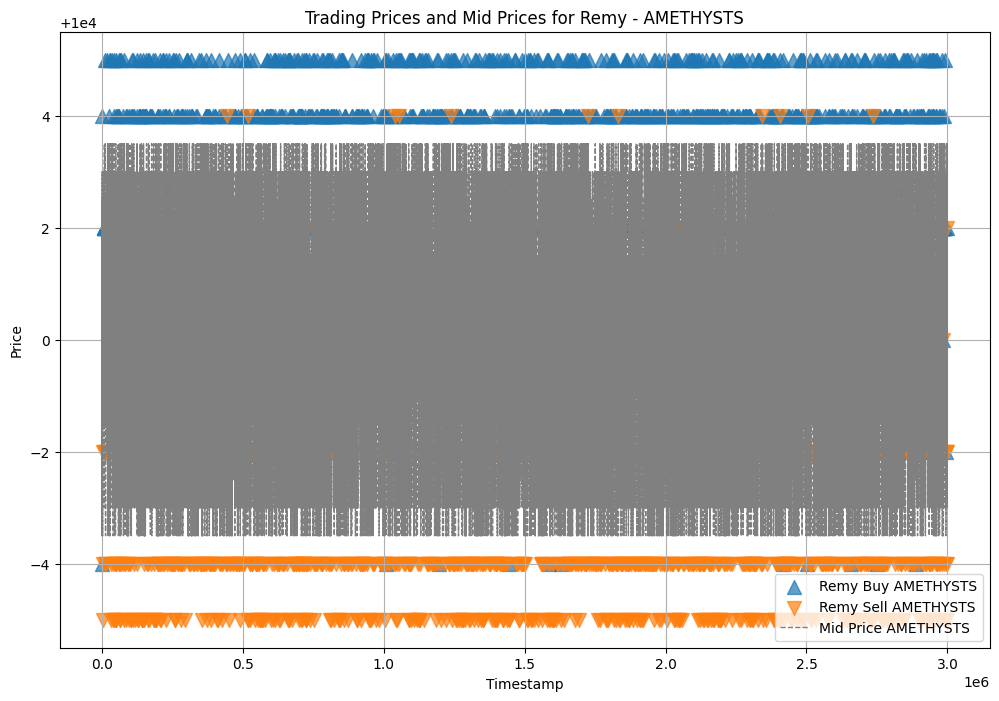

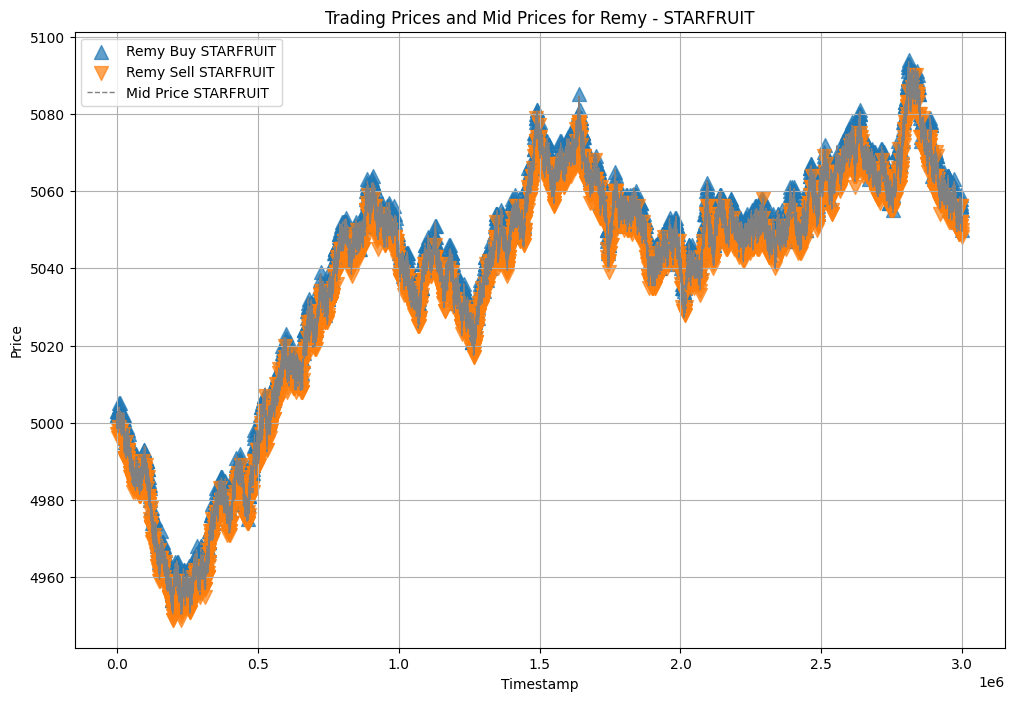

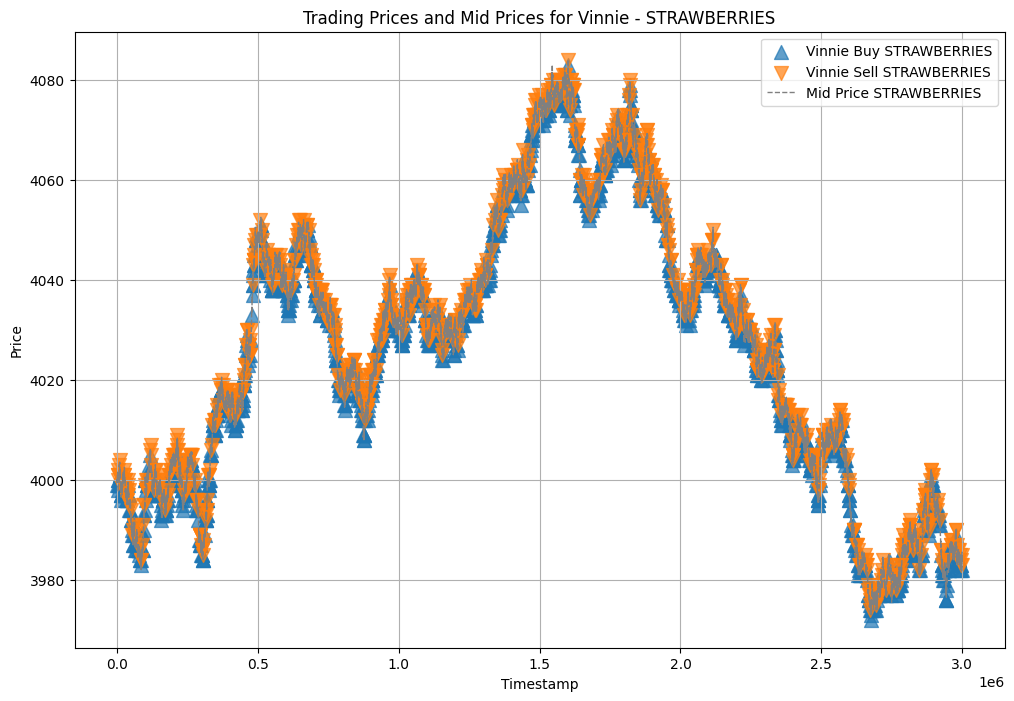

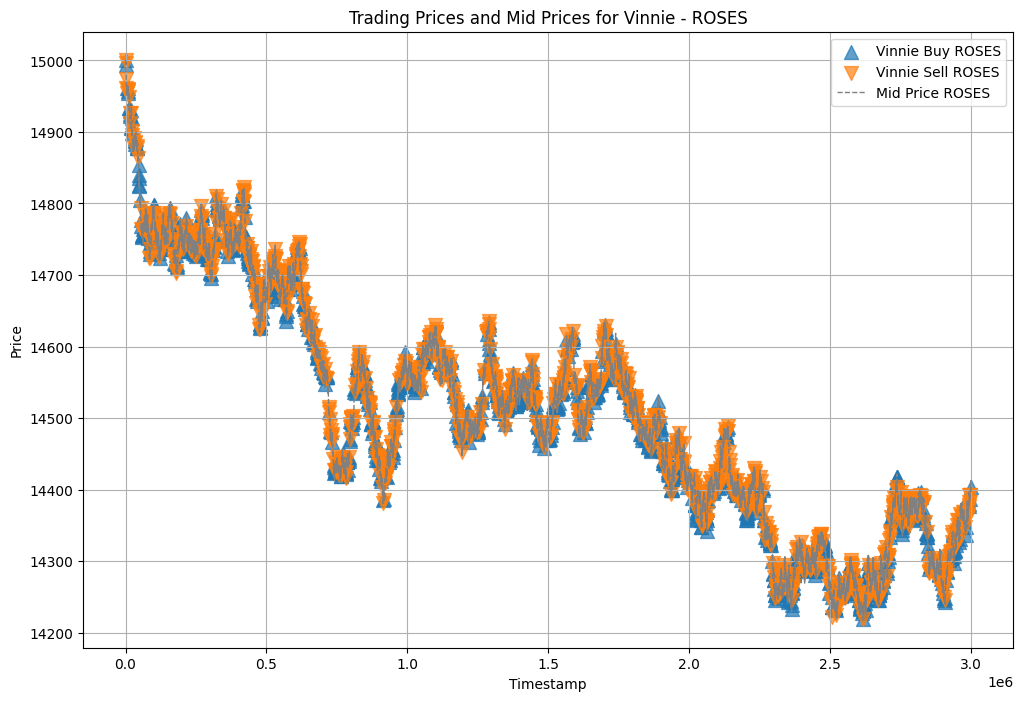

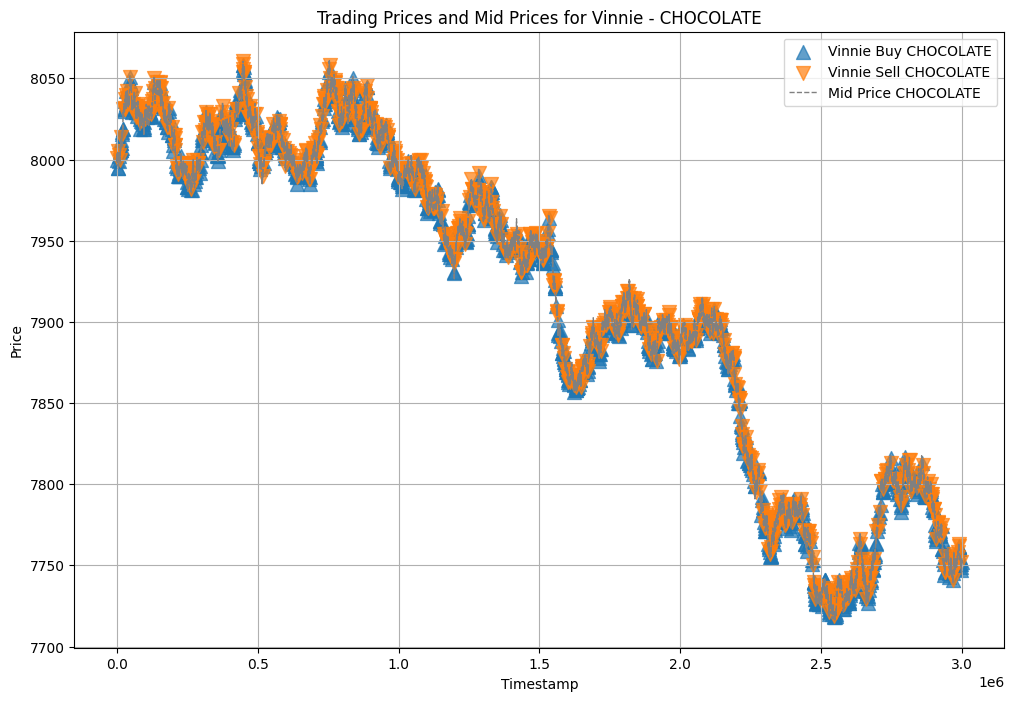

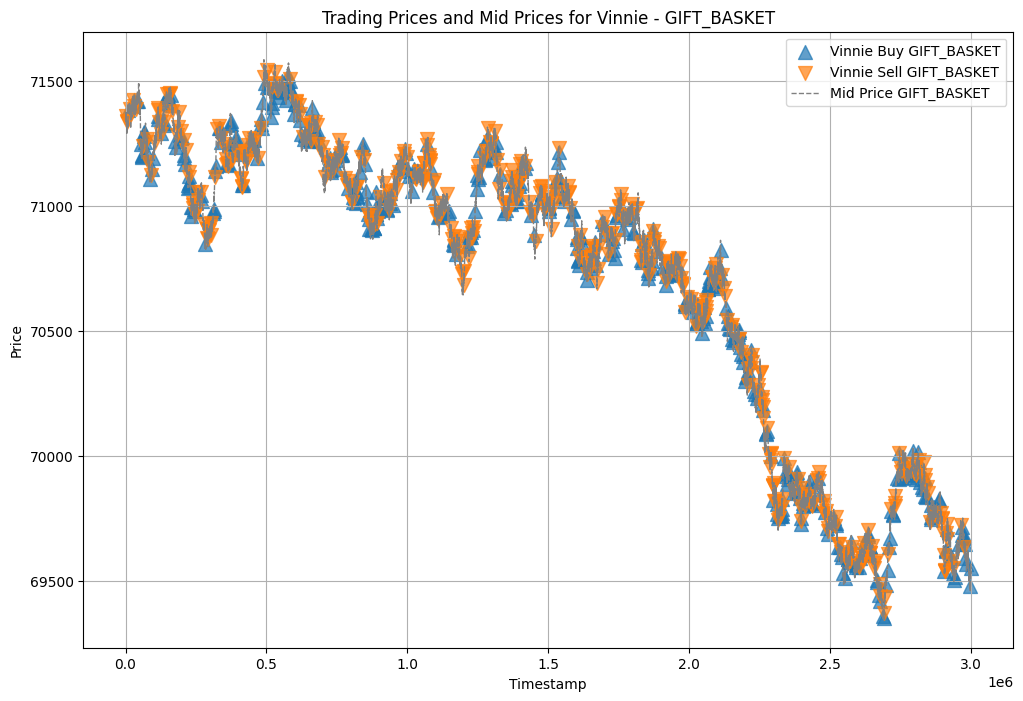

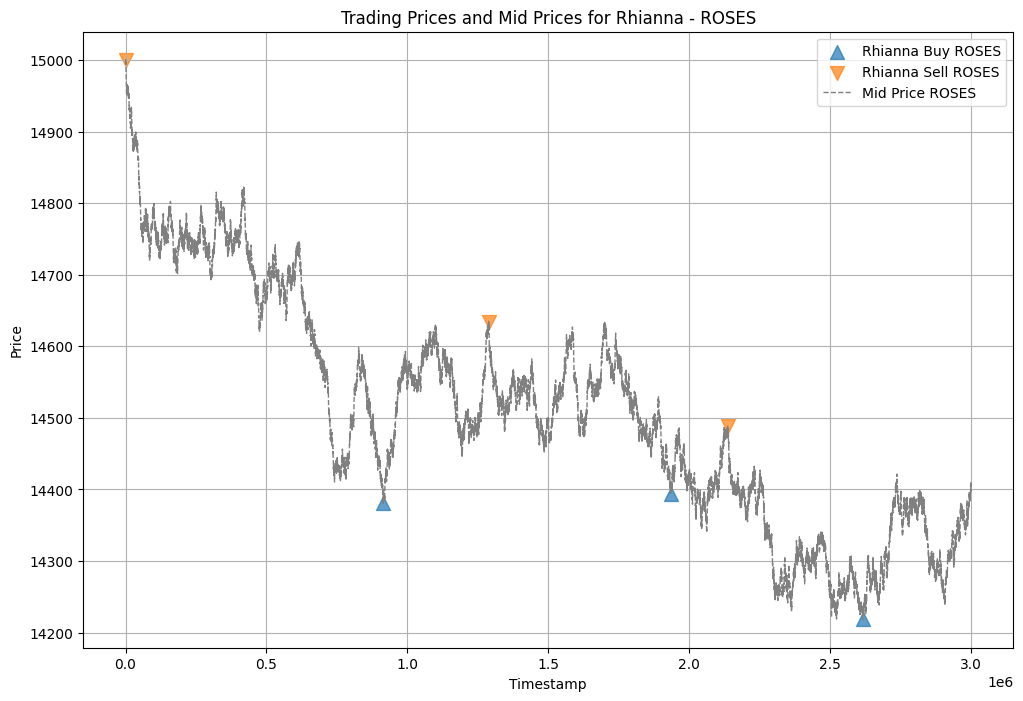

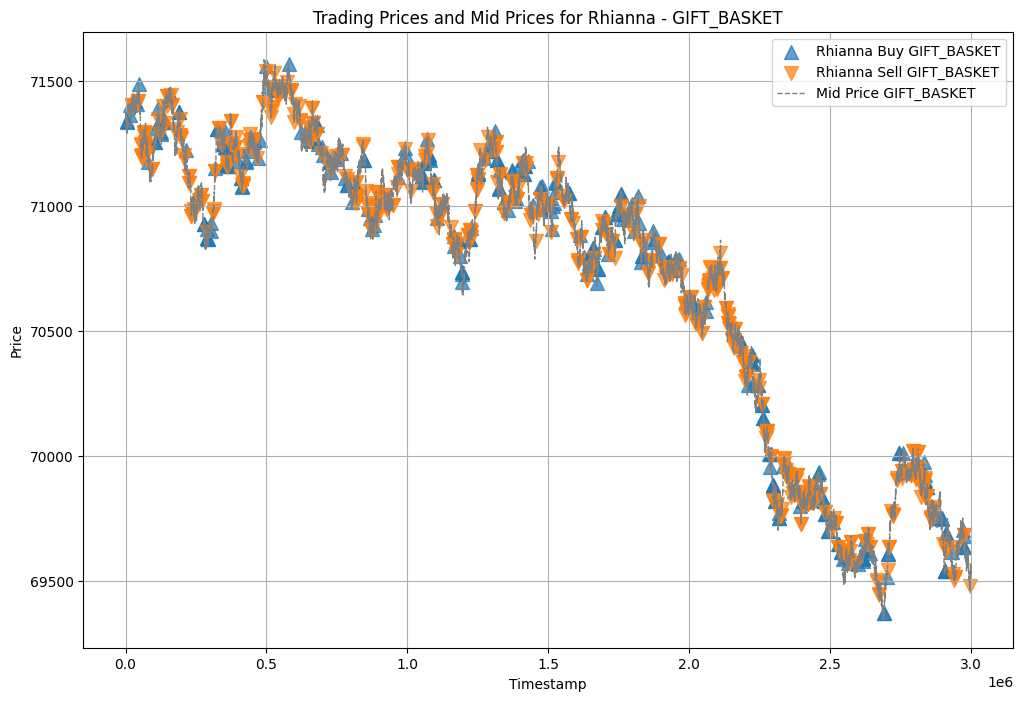

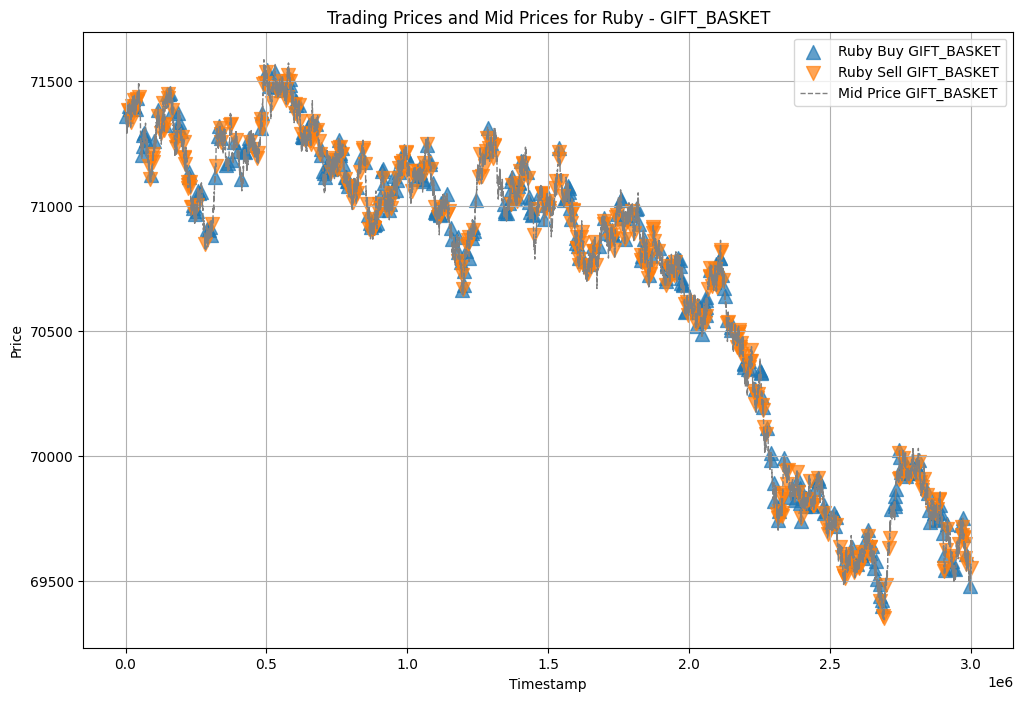

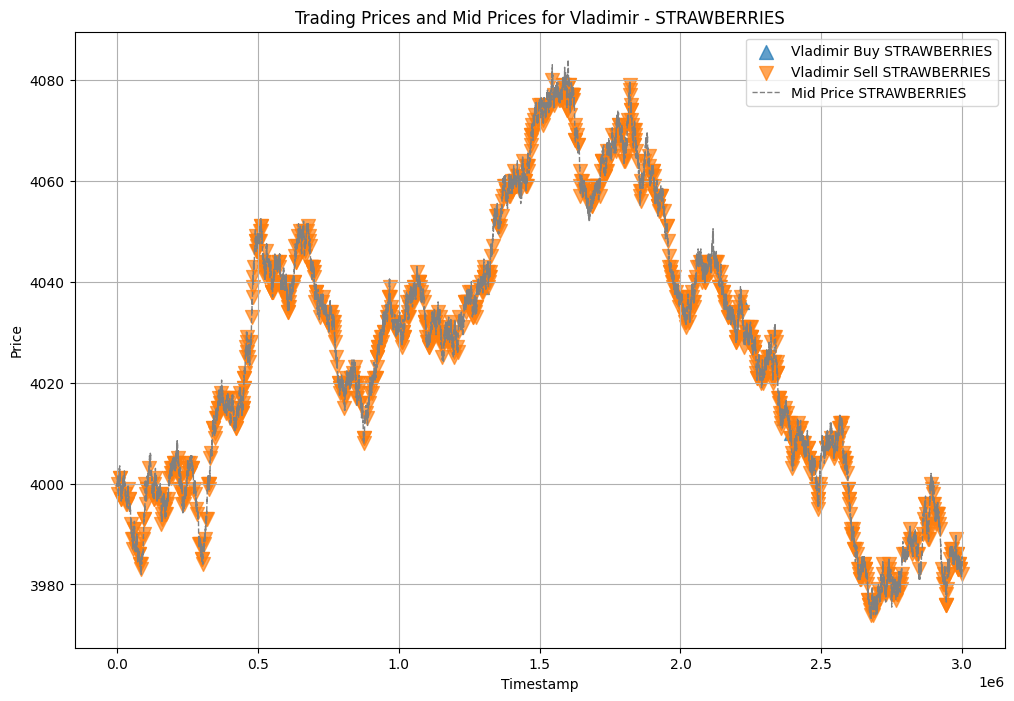

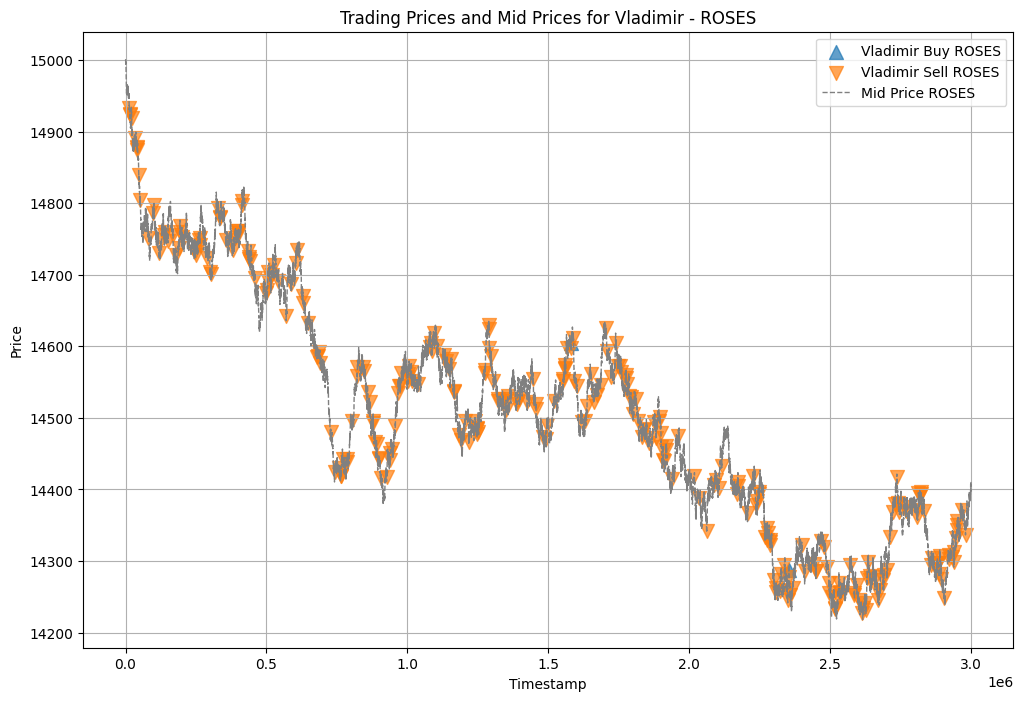

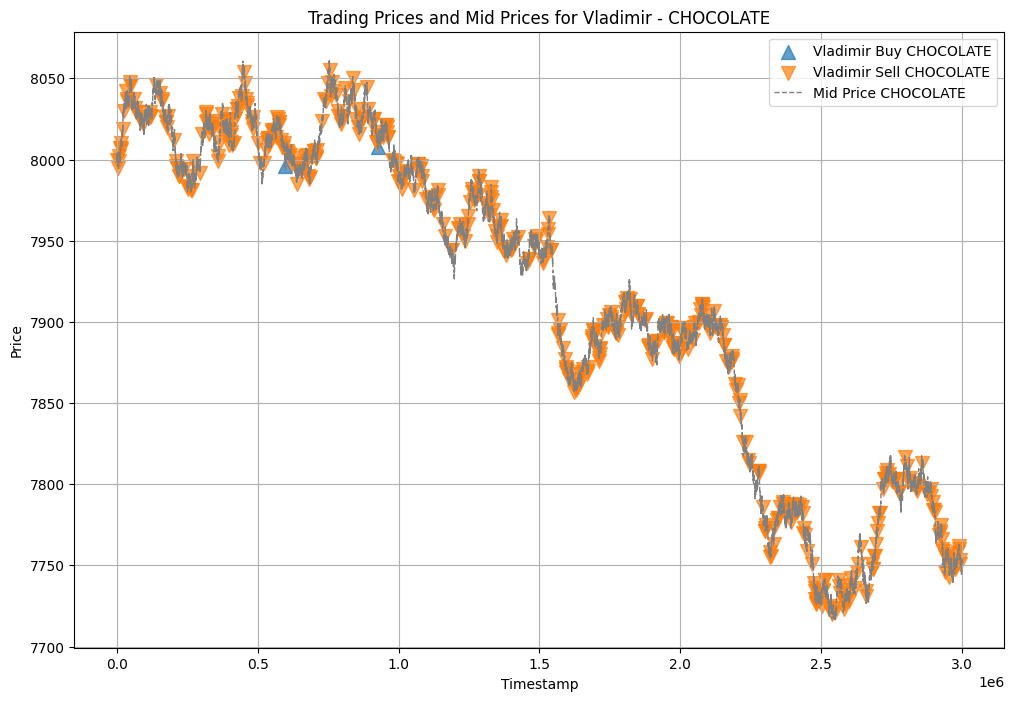

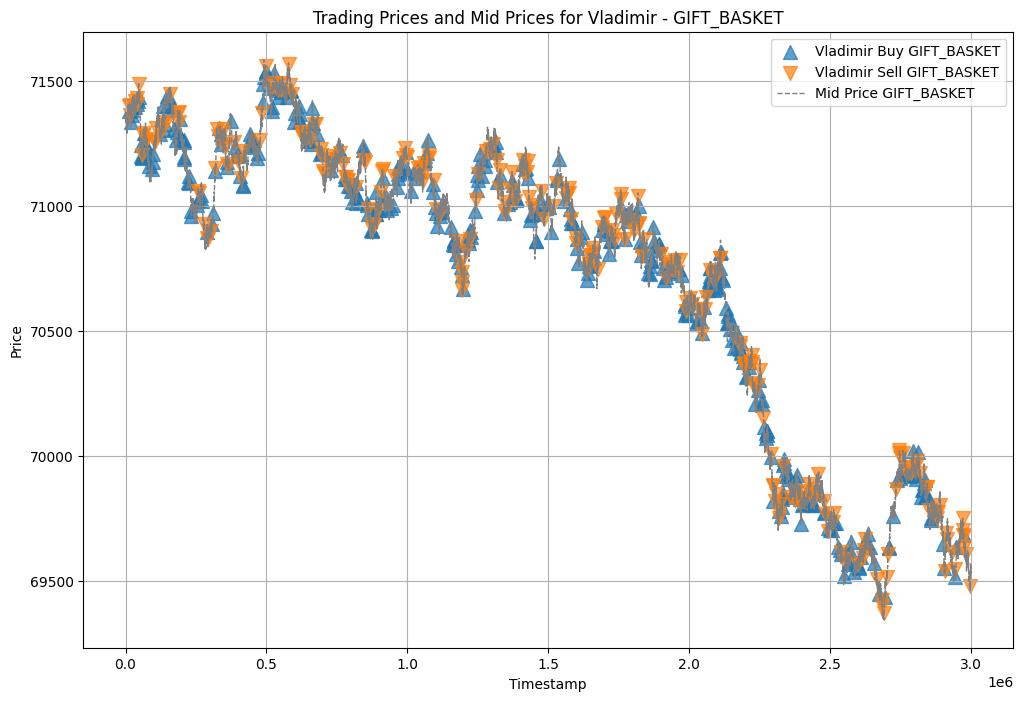

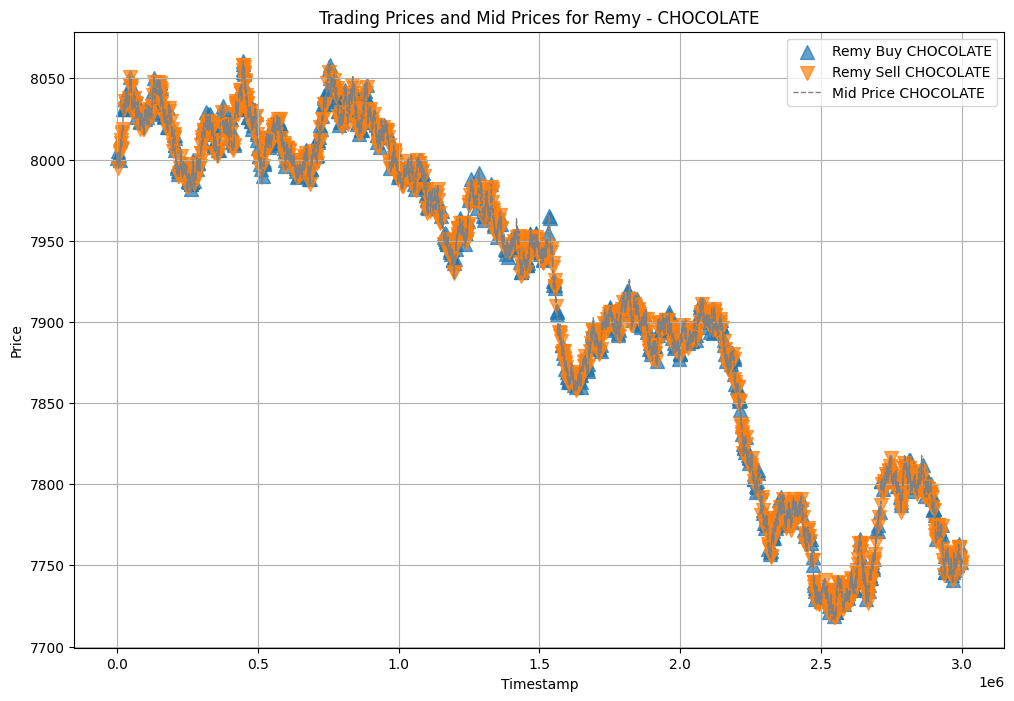

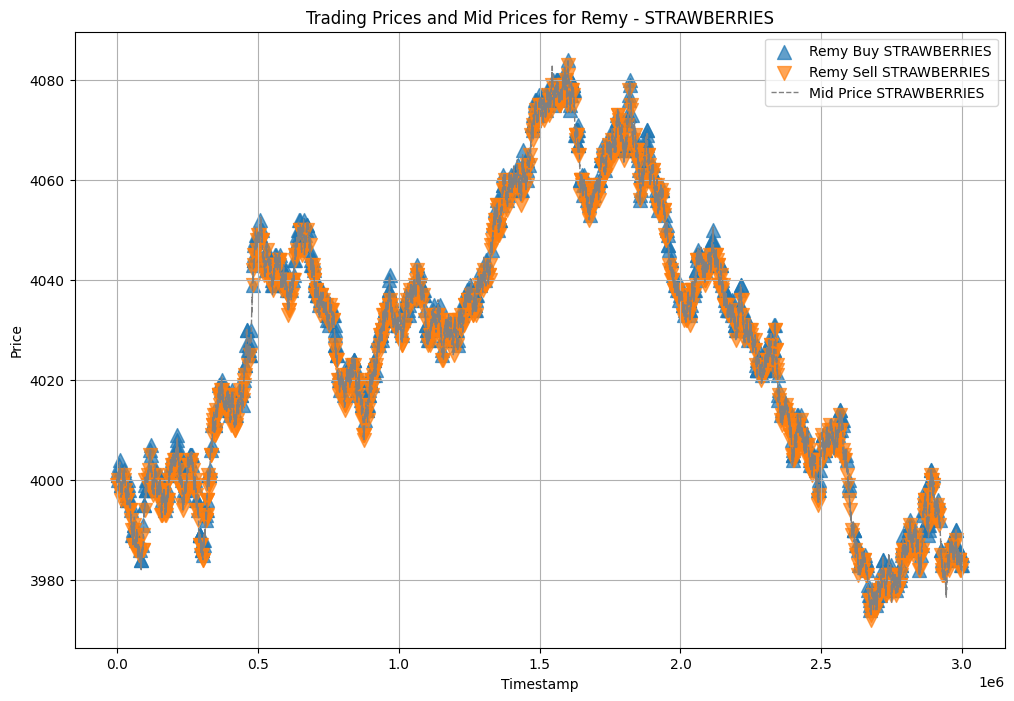

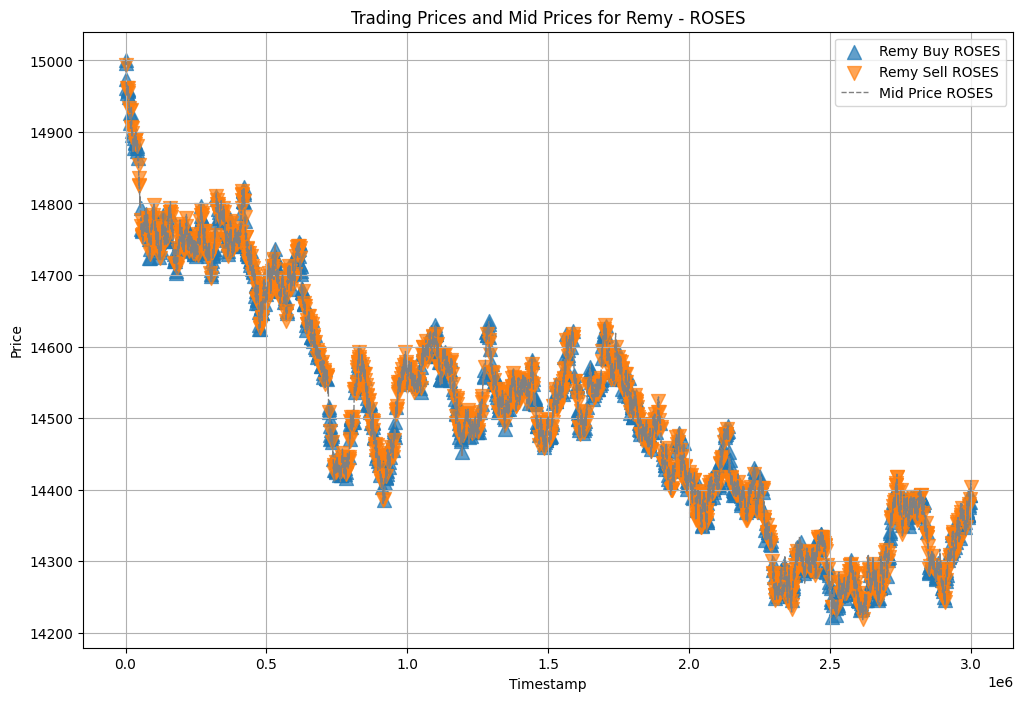

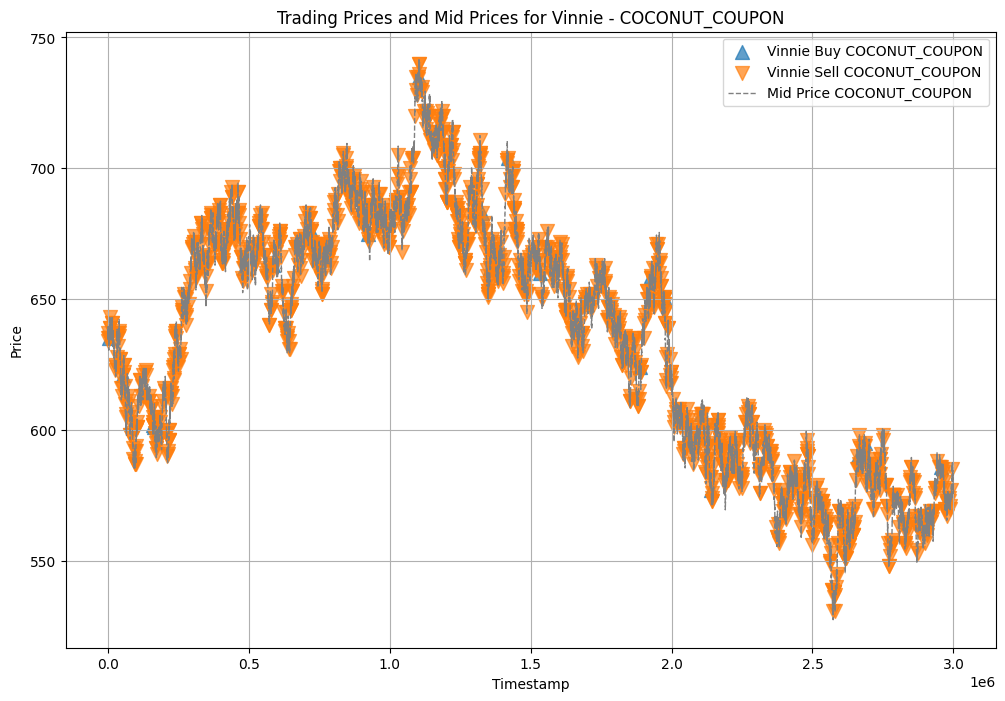

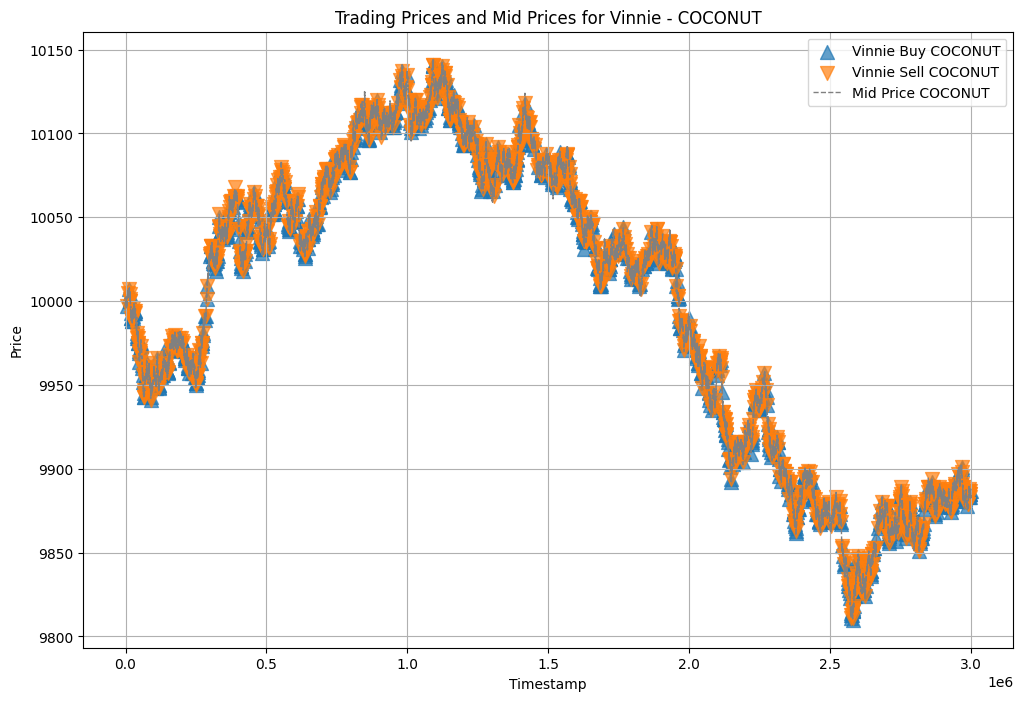

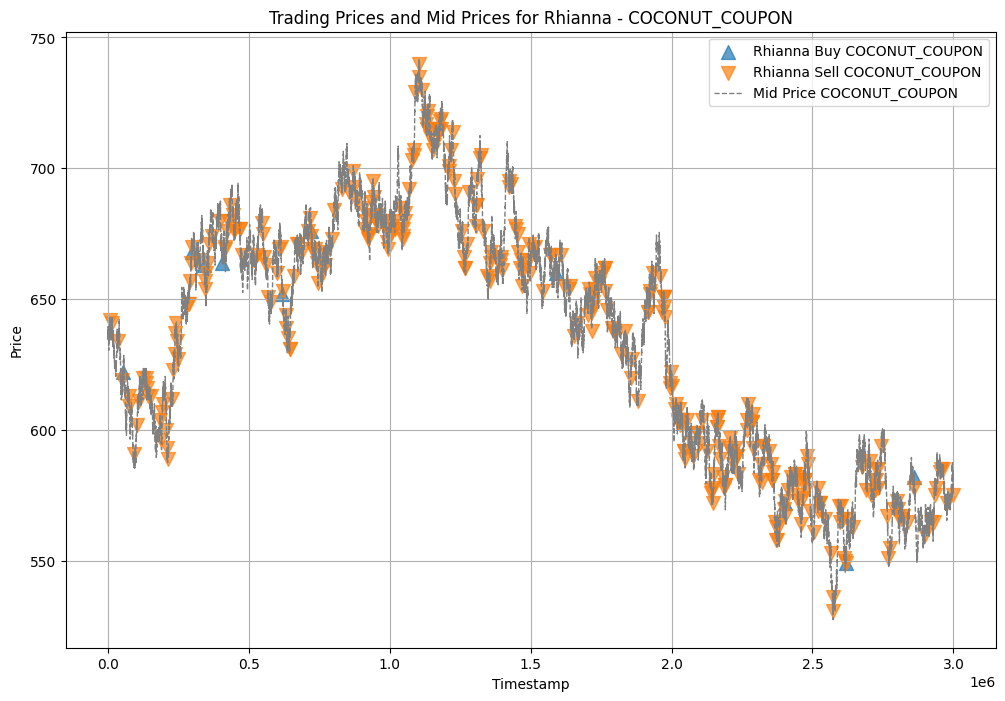

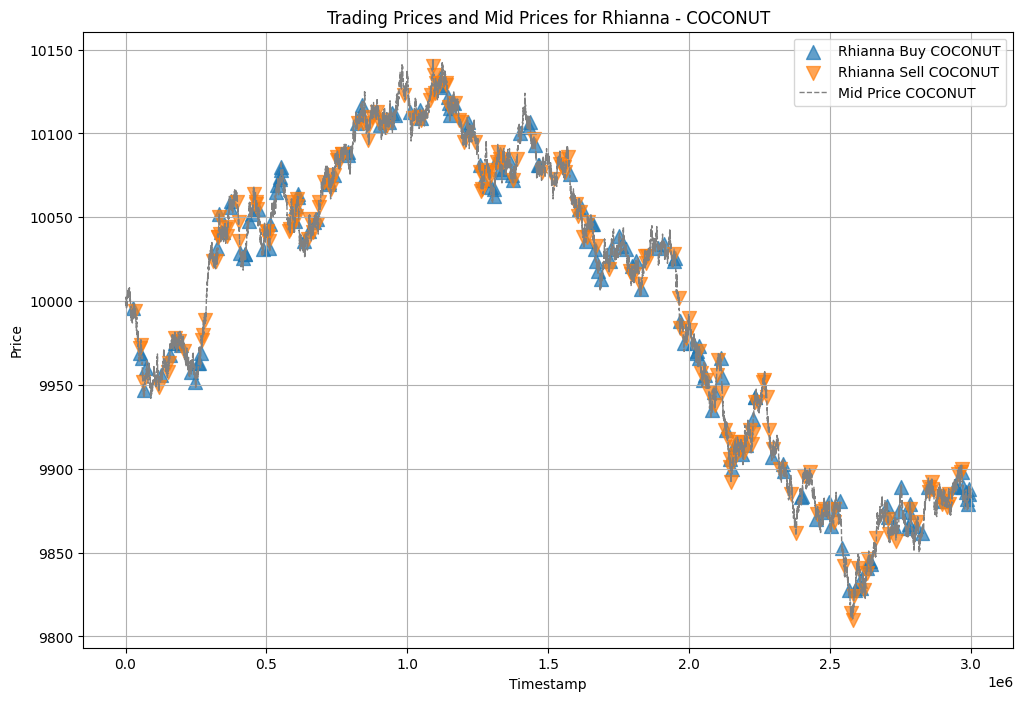

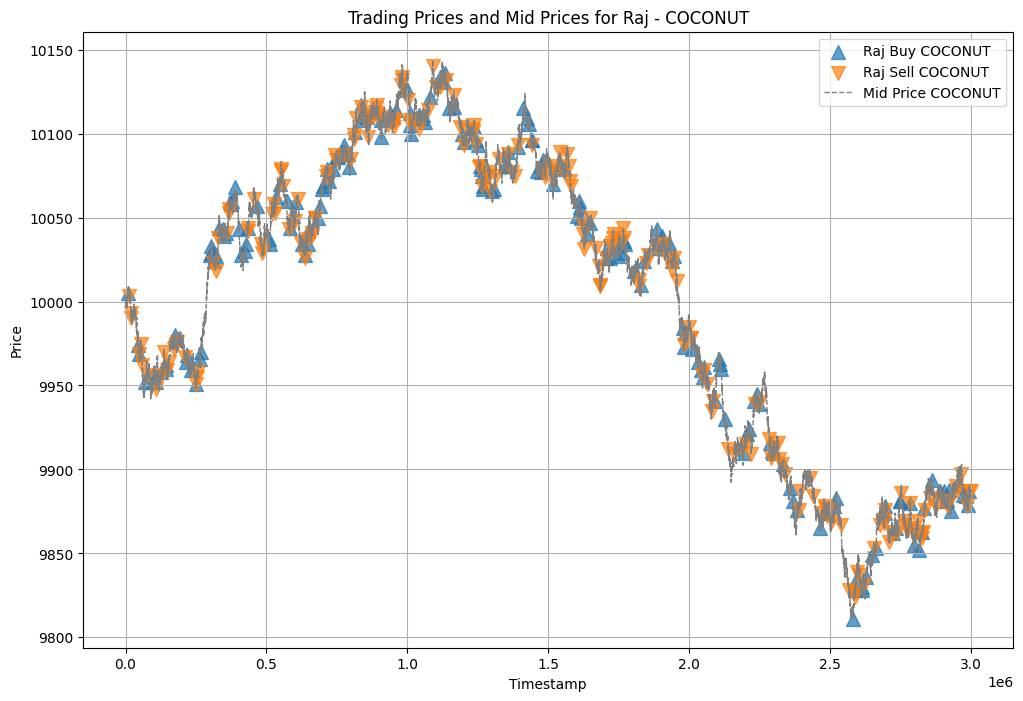

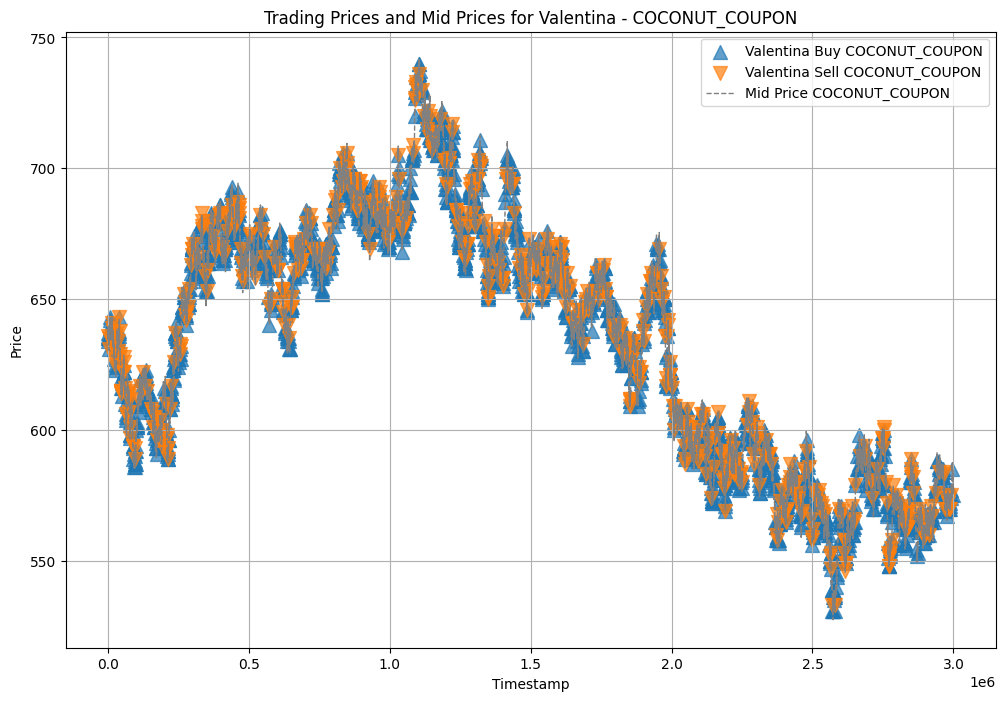

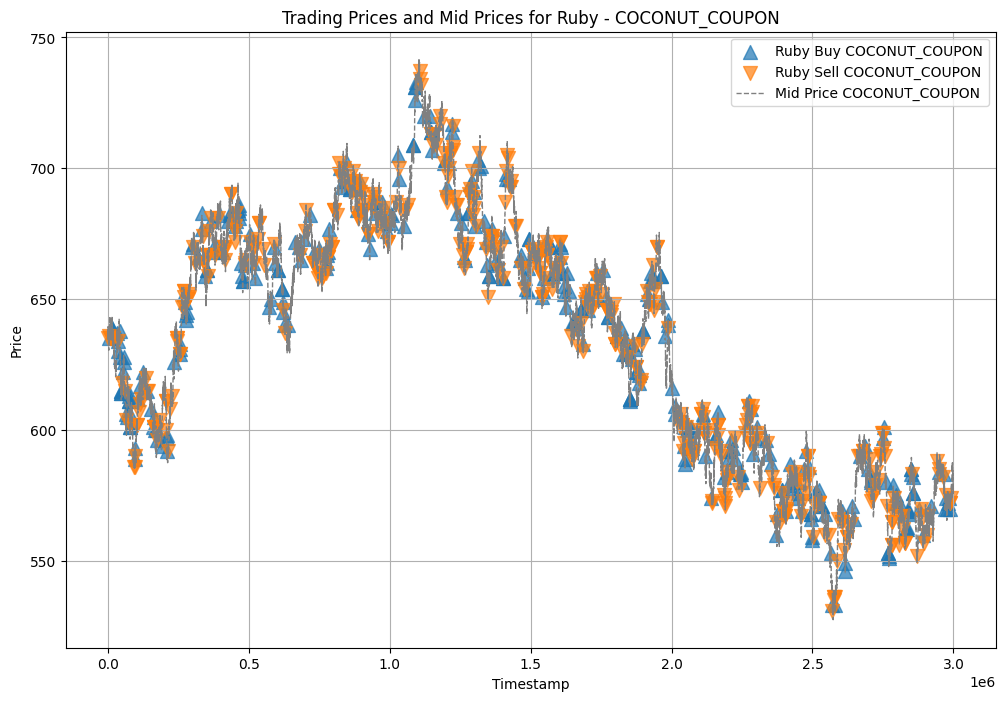

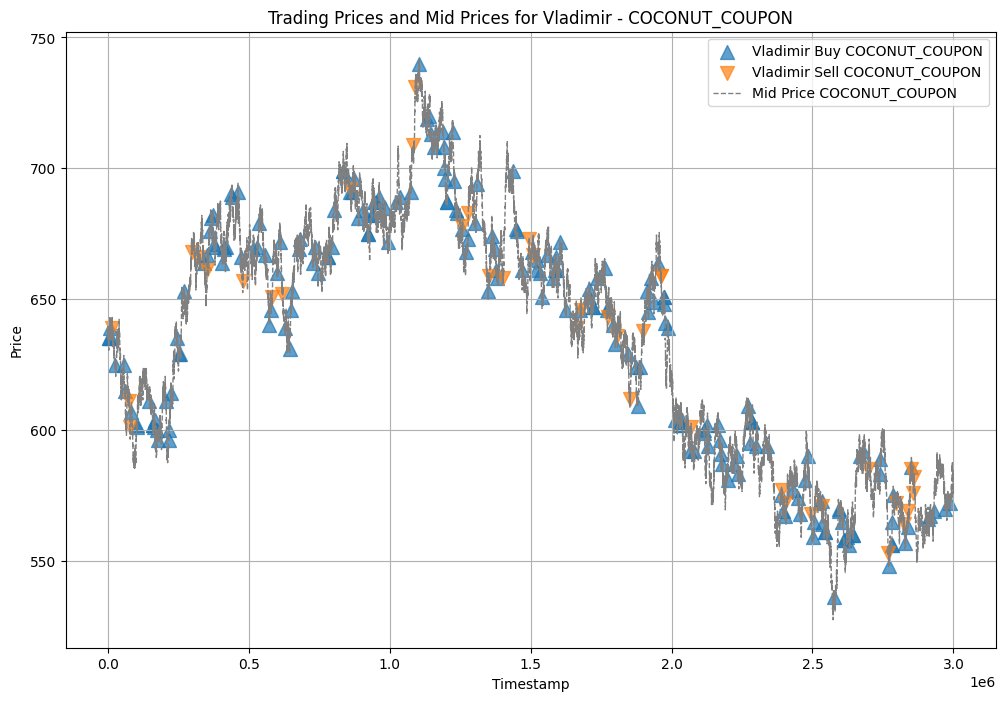

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def adjust_timestamps(data, day_offset):
    data['timestamp'] += day_offset * 1000000
    return data

round1_1 = adjust_timestamps(pd.read_csv('data/trades_round_1_day_-2_wn.csv', sep=';'), 0)
round1_2 = adjust_timestamps(pd.read_csv('data/trades_round_1_day_-1_wn.csv', sep=';'), 1)
round1_3 = adjust_timestamps(pd.read_csv('data/trades_round_1_day_0_wn.csv', sep=';'), 2)

round3_1 = adjust_timestamps(pd.read_csv('data/trades_round_3_day_0_wn.csv', sep=';'), 0)
round3_2 = adjust_timestamps(pd.read_csv('data/trades_round_3_day_1_wn.csv', sep=';'), 1)
round3_3 = adjust_timestamps(pd.read_csv('data/trades_round_3_day_2_wn.csv', sep=';'), 2)

round4_1 = adjust_timestamps(pd.read_csv('data/trades_round_4_day_1_wn.csv', sep=';'), 0)
round4_2 = adjust_timestamps(pd.read_csv('data/trades_round_4_day_2_wn.csv', sep=';'), 1)
round4_3 = adjust_timestamps(pd.read_csv('data/trades_round_4_day_3_wn.csv', sep=';'), 2)

round1_price2 = adjust_timestamps(pd.read_csv("data/prices_round_1_day_-2.csv", sep=";"), 0)
round1_price1 = adjust_timestamps(pd.read_csv("data/prices_round_1_day_-1.csv", sep=";"), 1)
round1_price0 = adjust_timestamps(pd.read_csv("data/prices_round_1_day_0.csv", sep=";"), 2)

round3_price0 = adjust_timestamps(pd.read_csv("data/prices_round_3_day_0.csv", sep=";"), 0)
round3_price1 = adjust_timestamps(pd.read_csv("data/prices_round_3_day_1.csv", sep=";"), 1)
round3_price2 = adjust_timestamps(pd.read_csv("data/prices_round_3_day_2.csv", sep=";"), 2)

round4_price1 = adjust_timestamps(pd.read_csv("data/prices_round_4_day_1.csv", sep=";"), 0)
round4_price2 = adjust_timestamps(pd.read_csv("data/prices_round_4_day_2.csv", sep=";"), 1)
round4_price3 = adjust_timestamps(pd.read_csv("data/prices_round_4_day_3.csv", sep=";"), 2)

SEASHELLS = "SEASHELLS"
AMETHYSTS = "AMETHYSTS"
STARFRUIT = "STARFRUIT"
ORCHIDS = "ORCHIDS"
CHOCOLATE = "CHOCOLATE"
STRAWBERRIES = "STRAWBERRIES"
ROSES = "ROSES"
GIFT_BASKET = "GIFT_BASKET"
COCONUT = "COCONUT"
COCONUT_COUPON = "COCONUT_COUPON"

r1_products = [AMETHYSTS, STARFRUIT]
r3_products = [CHOCOLATE, STRAWBERRIES, ROSES, GIFT_BASKET]
r4_products = [COCONUT, COCONUT_COUPON]

round_1 = pd.concat([round1_1, round1_2, round1_3])
round_3 = pd.concat([round3_1, round3_2, round3_3])
round_4 = pd.concat([round4_1, round4_2, round4_3])

round_1_prices = pd.concat([round1_price2, round1_price1, round1_price0])
round_3_prices = pd.concat([round3_price0, round3_price1, round3_price2])
round_4_prices = pd.concat([round4_price1, round4_price2, round4_price3])

r1_traders = round_1["buyer"].unique()
r3_traders = round_3["buyer"].unique()
r4_traders = round_4["buyer"].unique()

# print(r1_traders)
# print(r3_traders)
# print(r4_traders)
# Trader PnLs

def calc_pnl(trader, trades, round_prices):
    # Calculate the buy and sell components of PnL
    buys = trades[trades['buyer'] == trader]['price'] * trades[trades['buyer'] == trader]['quantity']
    sells = trades[trades['seller'] == trader]['price'] * trades[trades['seller'] == trader]['quantity']
    pnl = sells.sum() - buys.sum()
    
    # Calculate the final position in terms of quantity
    bought_quantity = trades[trades['buyer'] == trader]['quantity'].sum()
    sold_quantity = trades[trades['seller'] == trader]['quantity'].sum()
    final_position = bought_quantity - sold_quantity

    # Get the last mid price for the product
    last_mid_price = round_prices.iloc[-1]['mid_price'] if not round_prices.empty else 0
    
    # Adjust PnL to include the value of the final position at the last mid price
    pnl += final_position * last_mid_price
    
    return pnl

# Initialize dictionaries to hold PnL for each trader
r1_pnls = {trader: {} for trader in r1_traders}
r3_pnls = {trader: {} for trader in r3_traders}
r4_pnls = {trader: {} for trader in r4_traders}

# Calculate PnL for each trader and product using the last mid price
for trader in r1_traders:
    data = {product: round_1[round_1["symbol"] == product] for product in r1_products}
    prices_data = {product: round_1_prices[round_1_prices["product"] == product] for product in r1_products}
    for product, trades in data.items():
        pnl = calc_pnl(trader, trades, prices_data[product])
        r1_pnls[trader][product] = pnl

for trader in r3_traders:
    data = {product: round_3[round_3["symbol"] == product] for product in r3_products}
    prices_data = {product: round_3_prices[round_3_prices["product"] == product] for product in r3_products}
    for product, trades in data.items():
        pnl = calc_pnl(trader, trades, prices_data[product])
        r3_pnls[trader][product] = pnl

for trader in r4_traders:
    data = {product: round_4[round_4["symbol"] == product] for product in r4_products}
    prices_data = {product: round_4_prices[round_4_prices["product"] == product] for product in r4_products}
    for product, trades in data.items():
        pnl = calc_pnl(trader, trades, prices_data[product])
        r4_pnls[trader][product] = pnl



names = ["Valentina", "Vinnie", "Vladimir", "Vivian", "Celeste", "Colin", "Carlos", "Camilla", "Pablo", "Penelope", "Percy", "Petunia", "Ruby", "Remy", "Rihanna", "Raj", "Amelia", "Adam", "Alina", "Amir"]

# Function to plot trading prices for each trader and each product separately with mid-price overlay
def plot_trading_prices_with_mid(trades, mid_prices):
    # Extract buyers and sellers
    buyers = trades['buyer'].unique()
    sellers = trades['seller'].unique()
    
    # Get all unique traders
    traders = set(buyers).union(set(sellers))
    
    # Iterate over each trader to generate separate plots for each product
    for trader in traders:
        # Filter trades involving the trader as buyer and seller
        buyer_data = trades[(trades['buyer'] == trader) ]
        seller_data = trades[(trades['seller'] == trader) ]
        
        # Get all products traded by this trader
        products = set(buyer_data['symbol']).union(set(seller_data['symbol']))
        
        for product in products:
            # Set up the plot for this trader and product
            # if product=='ROSES':
            plt.figure(figsize=(12, 8))
            
            # Filter data for this product
            product_buyer_data = buyer_data[buyer_data['symbol'] == product]
            product_seller_data = seller_data[seller_data['symbol'] == product]
            
            # Get mid-price data for this product
            product_mid_prices = mid_prices[(mid_prices['product'] == product) ]
            
            if not product_buyer_data.empty:
                plt.scatter(product_buyer_data['timestamp'], product_buyer_data['price'], label=f"{trader} Buy {product}", alpha=0.7, marker='^', s=100)  # Increased marker size
            
            if not product_seller_data.empty:
                plt.scatter(product_seller_data['timestamp'], product_seller_data['price'], label=f"{trader} Sell {product}", alpha=0.7, marker='v', s=100)  # Increased marker size
            
            # Plot mid prices
            if not product_mid_prices.empty:
                plt.plot(product_mid_prices['timestamp'], product_mid_prices['mid_price'], label=f"Mid Price {product}", linestyle='--', color='gray', linewidth=1)  # Reduced line width

            # Customize plot with titles, labels, legend, and grid
            plt.title(f'Trading Prices and Mid Prices for {trader} - {product}')
            plt.xlabel('Timestamp')
            plt.ylabel('Price')
            plt.legend()
            plt.grid(True)
            plt.show()

# Use the function to plot for different rounds
print(r1_pnls)
print(r3_pnls)
print(r4_pnls)
plot_trading_prices_with_mid(round_1, round_1_prices)
plot_trading_prices_with_mid(round_3, round_3_prices)
plot_trading_prices_with_mid(round_4, round_4_prices)
